In [2]:
import pandas as pd #数据分析库，核心是DataFrame对象
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #训练集和测试集的划分，交叉验证评估模型，网格搜索优化超参数
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc #模型准确度 
import matplotlib.pyplot as pyt #绘制ROC曲线

In [3]:
df=pd.read_csv("C:\Learning\MachineLearning\RandomForest\\train.csv",header=0)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
""" subset = df[df['Survived'] == 0]

# 过采样倍数
oversampling_factor = 3

# 使用 sample 函数对 subset 进行过采样，将采样结果追加到原始数据集中
oversampled_df = pd.concat([df] + [subset.sample(frac=1, replace=True)] * (oversampling_factor - 1), axis=0)

# 输出过采样后的数据集
print(oversampled_df) """

" subset = df[df['Survived'] == 0]\n\n# 过采样倍数\noversampling_factor = 3\n\n# 使用 sample 函数对 subset 进行过采样，将采样结果追加到原始数据集中\noversampled_df = pd.concat([df] + [subset.sample(frac=1, replace=True)] * (oversampling_factor - 1), axis=0)\n\n# 输出过采样后的数据集\nprint(oversampled_df) "

In [5]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Cabin"]=df["Cabin"].bfill() #用相邻后面（back）特征填充前面缺失值
df["Embarked"]=df["Embarked"].fillna("S")
output=df
output.to_csv("final.csv")
len(df)

891

In [6]:
#看样本是否均衡，下采样(从多的样本中抽取跟少的样本中一样的数量)，过采样(把数据量少的样本重复多次使之数量与多的差不多)解决样本不均衡的情况
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
#删掉Survived列
x=df.drop("Survived",axis=1)
x.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   C85        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250  C123        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   E46        S

In [9]:
features=["Pclass","Sex","Age","Ticket","Fare","Cabin"]
from FuncToNumberClass import FuncToNumber
x=FuncToNumber.ToNumber(x.loc[:,features])


In [10]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

print(xtrain)

     Pclass  Sex  Age  Ticket  Fare  Cabin
887       1    0   24      14   153     30
416       2    0   45     224   161    115
479       3    0    6     251    79     31
134       2    1   33     552    85    107
588       3    1   28      79    43     96
..      ...  ...  ...     ...   ...    ...
400       3    1   52     663    41     78
118       1    1   31     585   244     36
701       1    1   47     579   141    120
206       3    1   42     247   106      8
867       1    1   41     590   184      6

[712 rows x 6 columns]


In [11]:
print(xtest)


     Pclass  Sex  Age  Ticket  Fare  Cabin
126       3    1   36     463    30    138
354       3    1   36     182    16    123
590       3    1   47     656    14     96
509       3    1   34      80   193    121
769       3    1   42     511    48    136
..      ...  ...  ...     ...   ...    ...
732       2    1   36     137     0     15
42        3    1   36     391    40    101
179       3    1   48     574     0    144
123       2    0   43     219    85    116
890       3    1   42     466    30    147

[179 rows x 6 columns]


In [12]:
print(ytest)

126    0
354    0
590    0
509    1
769    0
      ..
732    0
42     0
179    0
123    1
890    0
Name: Survived, Length: 179, dtype: int64


n_estimators : 随机森林中树的个数，即学习器的个数。 
max_features : 划分叶子节点，选择的最大特征数目 
n_features：在寻找最佳分割时要考虑的特征数量
max_depth : 树的最大深度，如果选择default=None，树就一致扩展，直到所有的叶子节点都是同一类样本，或者达到最小样本划分（min_samples_split）的数目。
min_samples_split : 最小样本划分的数目，就是样本的数目少于等于这个值，就不能继续划分当前节点了
min_samples_leaf : 叶子节点最少样本数，如果某叶子节点数目小于这个值，就会和兄弟节点一起被剪枝。
min_weight_fraction_leaf：叶子节点最小的样本权重和
max_leaf_nodes: 最大叶子节点数，默认是”None”，即不限制最大的叶子节点数
min_impurity_split：节点划分的最小不纯度，是结束树增长的一个阈值，如果不纯度超过这个阈值，那么该节点就会继续划分，否则不划分，成为一个叶子节点。
min_impurity_decrease : 最小不纯度减少的阈值，如果对该节点进行划分，使得不纯度的减少大于等于这个值，那么该节点就会划分，否则，不划分。
bootstrap :自助采样，又放回的采样，大量采样的结果就是初始样本的63.2%作为训练集。默认选择自助采样法。
oob_score : bool (default=False) 
out-of-bag estimate，包外估计；是否选用包外样本（即bootstrap采样剩下的36.8%的样本）作为验证集，对训练结果进行验证，默认不采用。
n_jobs : 并行使用的进程数，默认1个，如果设置为-1，该值为总的核数。
random_state ：随机状态，默认由np.numpy生成
verbose：显示输出的一些参数，默认不输出。

In [13]:
rfc=RandomForestClassifier()  #实例化
rfc.fit(xtrain,ytrain) 

RandomForestClassifier()

In [14]:
predicts=rfc.predict(xtest)
predicts


array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [15]:
predicts_proba=rfc.predict_proba(xtest)[:,:]
predicts_proba

array([[0.91, 0.09],
       [0.86, 0.14],
       [0.68, 0.32],
       [0.24, 0.76],
       [0.82, 0.18],
       [0.93, 0.07],
       [0.01, 0.99],
       [0.87, 0.13],
       [0.04, 0.96],
       [0.96, 0.04],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.33, 0.67],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.15, 0.85],
       [0.97, 0.03],
       [0.47, 0.53],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.81, 0.19],
       [0.41, 0.59],
       [0.03, 0.97],
       [0.18, 0.82],
       [0.85, 0.15],
       [0.55, 0.45],
       [0.77, 0.23],
       [0.67, 0.33],
       [0.65, 0.35],
       [0.88, 0.12],
       [0.93, 0.07],
       [0.53, 0.47],
       [0.2 , 0.8 ],
       [0.98, 0.02],
       [0.09, 0.91],
       [0.45, 0.55],
       [0.97, 0.03],
       [0.77, 0.23],
       [0.82, 0.18],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.91, 0.09],
       [0.96, 0.04],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.09, 0.91],
       [0.04,

In [16]:
row=df.loc[xtest.index]
output = pd.DataFrame({'PassengerId':row.PassengerId, "Name":row.Name, 'ActualSurvived': row.Survived, 'PredictSurvived': predicts})

output.to_csv('result.csv', index=False)
outputresult=output[output.ActualSurvived==output.PredictSurvived]
len(outputresult)
len(outputresult)/len(output)

0.8491620111731844

In [17]:
'''percent = accuracy_score(ytest,predicts)
print("准确率:", round(percent, 3))'''

roc_auc_score(ytest,rfc.predict_proba(xtest)[:,1])

0.8579093799682036

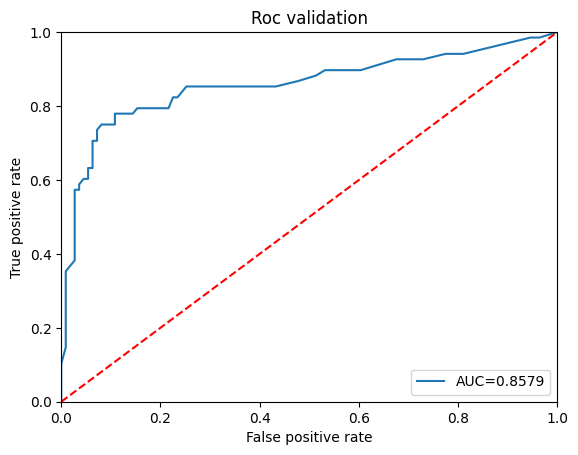

In [18]:
predict_validation=rfc.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,predict_validation)
roc_auc=auc(fpr,tpr)
pyt.title("Roc validation")
pyt.plot(fpr,tpr,label="AUC=%0.4f" %roc_auc)
pyt.legend(loc='lower right')
pyt.plot([0,1],[0,1],'r--')
pyt.xlim([0,1])
pyt.ylim([0,1])
pyt.ylabel("True positive rate")
pyt.xlabel("False positive rate")
pyt.show()

In [19]:

rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
rfc=RandomForestClassifier()  #实例化


score=cross_val_score(rfc,xtrain,ytrain,scoring='roc_auc',cv=5)
print(score)
print(score.mean())

[0.88688017 0.91869835 0.86290491 0.87920585 0.80944865]
0.8714275856791531


In [21]:
rfc1=LogisticRegression()  #实例化
score=cross_val_score(rfc1,xtrain,ytrain,scoring='roc_auc',cv=4)
print(score)
print(score.mean())

[0.86956522 0.88086691 0.8565508  0.76604278]
0.843256426568887


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#调整超参数
params_test1 = {'n_estimators' :range(25,500,25)}
gsearch1=GridSearchCV(estimator=RandomForestClassifier(min_samples_split=2,
                                                       min_samples_leaf=1,
                                                       max_depth=8,random_state=2),
                                                       param_grid=params_test1,
                                                       scoring='roc_auc',
                                                       cv=5)
gsearch1.fit(xtrain,ytrain)
print(gsearch1.best_params_,gsearch1.best_score_)
              
              

{'n_estimators': 450} 0.8753070939277835


In [23]:
params_test2 = {'max_depth' :range(2,30,3)}
gsearch2=GridSearchCV(estimator=RandomForestClassifier(n_estimators=225,
                                                       min_samples_split=2,
                                                       min_samples_leaf=1,random_state=2),
                                                       param_grid=params_test2,
                                                       scoring='roc_auc',
                                                       cv=5)
gsearch2.fit(xtrain,ytrain)
print(gsearch2.best_params_,gsearch2.best_score_)

{'max_depth': 11} 0.8767195729499804


In [24]:
gsearch2.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=225, random_state=2)

In [25]:
#accuracy_score(ytest,gsearch3.best_estimator_.predict_proba(xtest)[:,1])
roc_auc_score(ytest,gsearch2.best_estimator_.predict_proba(xtest)[:,1])

0.8657260201377848

In [26]:
df1=pd.read_csv("C:\Learning\MachineLearning\RandomForest\\test.csv",header=0)
df1.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [27]:
from FuncToNumberClass import FuncToNumber
xtest2=FuncToNumber.ToNumber(df1.loc[:,features])

In [28]:
rfc=RandomForestClassifier(max_depth=14, min_samples_leaf=1, min_samples_split=2,
                       n_estimators=230, random_state=2)  #实例化
rfc.fit(x,y) 

RandomForestClassifier(max_depth=14, n_estimators=230, random_state=2)

In [29]:
predictresult=rfc.predict(xtest2)
row=df1.loc[xtest2.index]
output = pd.DataFrame({'PassengerId': row.PassengerId,"Name":row.Name,'PredictSurvived': predictresult})
output.to_csv("ResultPredict.csv",index=0)

In [31]:
import pickle

# 保存模型
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

# 加载模型
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 使用加载后的模型进行预测或其他操作
result = loaded_model.predict(xtest2)
print(result)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0]
